#### Data cleaning and Transformation

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the excel dataset

health_df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name = 'Dataset')

In [3]:
health_df.head(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [4]:

print(("rows, Columns"),health_df.shape)

rows, Columns (3424, 69)


In [11]:
# Checking the unique values of all variabls in the dataset.

for col in health_df.columns:
    print(col, health_df[col].unique()[0:10], '\n') # Checking for just the first 10 of the unique values

Ptid ['P1' 'P2' 'P3' 'P4' 'P5' 'P6' 'P7' 'P8' 'P9' 'P10'] 

Persistency_Flag ['Persistent' 'Non-Persistent'] 

Gender ['Male' 'Female'] 

Race ['Caucasian' 'Asian' 'Other/Unknown' 'African American'] 

Ethnicity ['Not Hispanic' 'Hispanic' 'Unknown'] 

Region ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast'] 

Age_Bucket ['>75' '55-65' '65-75' '<55'] 

Ntm_Speciality ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION'] 

Ntm_Specialist_Flag ['Others' 'Specialist'] 

Ntm_Speciality_Bucket ['OB/GYN/Others/PCP/Unknown' 'Endo/Onc/Uro' 'Rheum'] 

Gluco_Record_Prior_Ntm ['N' 'Y'] 

Gluco_Record_During_Rx ['N' 'Y'] 

Dexa_Freq_During_Rx [ 0  2  7  3  5 20 13  1  6 12] 

Dexa_During_Rx ['N' 'Y'] 

Frag_Frac_Prior_Ntm ['N' 'Y'] 

Frag_Frac_During_Rx ['N' 'Y'] 

Risk_Segment_Prior_Ntm ['VLR_LR' 'HR_VHR'] 

Tscore_Bucket_Prior_Ntm ['>-2.5' '

In [24]:
# Checking for the breakdown of variable types

# Checking for numerical variables
discrete_var = [value for value in health_df.columns if health_df[value].dtype!='O' and health_df[value].nunique()<10]
continous_var = [value for value in health_df.columns if health_df[value].dtype!='O' and value not in discrete_var]

# categorical
categorical_var= [value for value in health_df.columns if health_df[value].dtype=='O' ]

print('The dataset contains:\n')
print('{} discrete variables'.format(len(discrete_var)))
print('{} continuous variables'.format(len(continous_var)))
print('{} categorical variables'.format(len(categorical_var)))


The dataset contains:

1 discrete variables
1 continuous variables
67 categorical variables


In [25]:
discrete_var

['Count_Of_Risks']

In [26]:
continous_var

['Dexa_Freq_During_Rx']

In [27]:
categorical_var

['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_S

### Handling missing values in the dataset

In [5]:
# In the  dataframe, the null/missing values were captured as unknown, hence the need for transformation

# Replacing the unknown values with NAN
health_df = health_df.replace('Unknown', np.nan)
health_df = health_df.replace('Other/Unknown', np.nan)

In [6]:
health_df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,NaN,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [8]:
# Duplicating the dataset without affectting the original copy during subsequent analysis

health_df1 = health_df.copy()

In [9]:
health_df1.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,NaN,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [10]:
# Checking for the categorical columns with missing values

categorical_cols_with_nan = health_df1.select_dtypes(include='object').columns[health_df1.select_dtypes(include='object').isnull().any()]
categorical_cols_with_nan

Index(['Race', 'Ethnicity', 'Region', 'Ntm_Speciality',
       'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score',
       'Change_Risk_Segment'],
      dtype='object')

In [12]:
# Viweing the first 5 rows of cloumns with missing values

health_df1[categorical_cols_with_nan].head()

,Race,Ethnicity,Region,Ntm_Speciality,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment
0,Caucasian,Not Hispanic,West,GENERAL PRACTITIONER,VLR_LR,<=-2.5,No change,NaN
1,Asian,Not Hispanic,West,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN
2,NaN,Hispanic,Midwest,GENERAL PRACTITIONER,HR_VHR,<=-2.5,No change,No change
3,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,HR_VHR,<=-2.5,No change,No change
4,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN


Since all the missing values are form the categorical type, mode imputation will be implemented first

In [63]:
# USING MODE IMPUTATION

# Impute missing values with mode for each categorical column

for col in categorical_cols_with_nan:
    mode_value = health_df1[col].mode()[0]  # Calculate mode for the column
    health_df1[col].fillna(mode_value, inplace=True)  # Fill missing values with mode

In [65]:
# Checking for missing values after mode imputation

print(health_df1[categorical_cols_with_nan].isnull().sum())

Race                       0
Ethnicity                  0
Region                     0
Ntm_Speciality             0
Risk_Segment_During_Rx     0
Tscore_Bucket_During_Rx    0
Change_T_Score             0
Change_Risk_Segment        0
dtype: int64


In [71]:
print(("rows, Columns"),health_df1.shape)

rows, Columns (3424, 69)


In [ ]:
# Saving the modified dataset to a file

health_df1.to_csv('mode_imputed_dataset.csv', index=False)

In [68]:
health_df1.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Caucasian,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


The missing values were handles sucessfully using the mode imputation

In [ ]:
# USING MODEL BASED 
# Using KNN imputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [24]:
health_df2 = health_df.copy()

In [25]:
health_df2.head(3)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,NaN,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2


In [26]:
health_df2[categorical_cols_with_nan].head(3)

,Race,Ethnicity,Region,Ntm_Speciality,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment
0,Caucasian,Not Hispanic,West,GENERAL PRACTITIONER,VLR_LR,<=-2.5,No change,NaN
1,Asian,Not Hispanic,West,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN
2,NaN,Hispanic,Midwest,GENERAL PRACTITIONER,HR_VHR,<=-2.5,No change,No change


In [ ]:
'''

#Encoding the categorical variables with labels
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in categorical_cols_with_nan:
    health_df2[col] = encoder.fit_transform(health_df2[col].astype(str))
    
'''

In [20]:
health_df2[categorical_cols_with_nan].head(3)

,Race,Ethnicity,Region,Ntm_Speciality,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment
0,2,1,3,5,1,0,1,3
1,1,1,3,5,2,2,3,3
2,3,0,0,5,0,0,1,1


In [27]:
# Splitting the dataset into complete and missing parts

complete_df = health_df2.dropna()
missing_df = health_df2[health_df2.isnull().any(axis=1)]

In [28]:
complete_df.head(3)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
7,P8,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
11,P12,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [30]:
missing_df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,NaN,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
5,P6,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,N,N,N,N,N,N,N,2


In [35]:
# Encoding the categorical columns in the complete cases
from sklearn.preprocessing import LabelEncoder

complete_cat_var = [col for col in complete_df.columns if complete_df[col].dtype == 'O']

encoder = LabelEncoder()
for col in complete_cat_var:
    complete_df.loc[:, col] = encoder.fit_transform(complete_df[col].astype(str))


In [36]:
from sklearn.impute import KNNImputer

# Selecting a model and trainning it

imputer = KNNImputer(n_neighbors=5)
imputer.fit(complete_df)

KNNImputer()

In [46]:
# Imputting the missing values

# First encoding the categorical columns in the missing cases
from sklearn.preprocessing import LabelEncoder

missing_cat_var = [col for col in missing_df.columns if missing_df[col].dtype == 'O']

encoder = LabelEncoder()
for col in missing_cat_var:
    missing_df.loc[:, col] = encoder.fit_transform(missing_df[col].astype(str))

# Impute the missing values using the KNN fitted model
imputed_values = imputer.transform(missing_df)

In [47]:
# Merge imputed data with original dataset
imputed_df = pd.DataFrame(imputed_values, columns=missing_df.columns)
merged_df = pd.concat([complete_df, imputed_df])

In [49]:
merged_df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3,853.0,0.0,0.0,2.0,1.0,0.0,3.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,978.0,0.0,0.0,2.0,1.0,0.0,3.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,58.0,0.0,0.0,2.0,1.0,0.0,3.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,76.0,0.0,0.0,2.0,1.0,0.0,3.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,99.0,0.0,0.0,2.0,1.0,0.0,3.0,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0


In [53]:

# Saving the imputed dataset
merged_df.to_csv('KNN_imputed_dataset.csv', index=False)


From the two imputation methods used, mode imputation appears easy and straightforward.Also it does not need variable encoding before imputation.

Handling Skewness in munerical variables

In [61]:
health_df3 = health_df.copy()

In [62]:
# Getting the Skewness Measure for each numerical variables

numerical_cols = health_df3.select_dtypes(include=['int64', 'float64']).columns

# Skewness for numerical columns
skewness = health_df3[numerical_cols].skew()
print("Skewness of each numerical variable before transformation:")
print(skewness)

Skewness of each numerical variable before transformation:
Dexa_Freq_During_Rx    6.808730
Count_Of_Risks         0.879791
dtype: float64


<Figure size 1000x600 with 0 Axes>

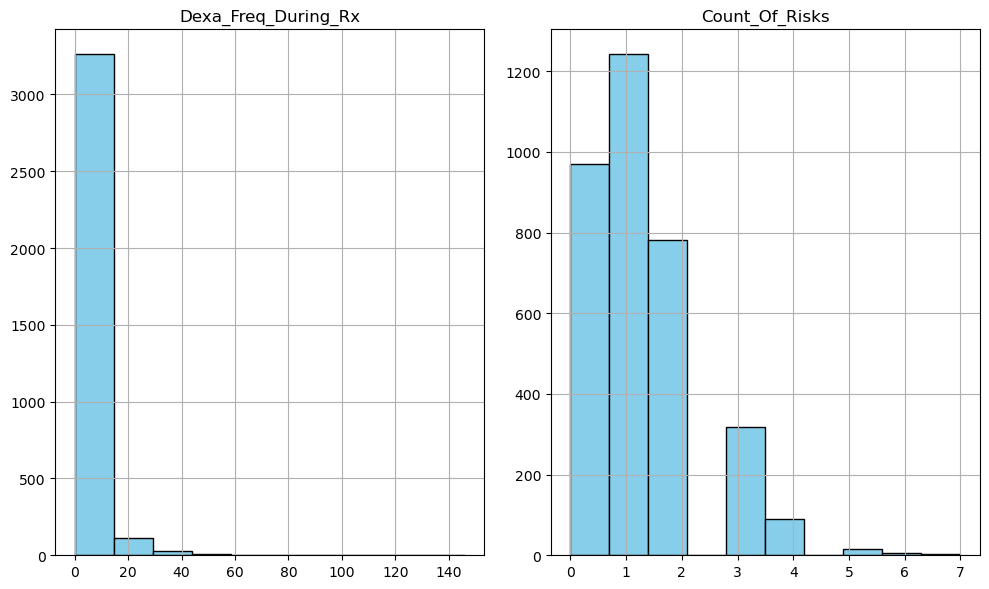

In [80]:
# Histogram of the skewed numerical features

plt.figure(figsize=(10, 6))
health_df3.hist(color='skyblue', edgecolor='black', figsize=(10, 6))
plt.tight_layout()  
plt.show()

In [72]:
# Applying log transformation to skewed columns

skewed_features = skewness[abs(skewness) > 0.5].index
health_df3[skewed_features] = np.log1p(health_df3[skewed_features])


In [73]:
# Skewness after log transformation

skewness_after = health_df3[skewed_features].skew()
print("Skewness of each numerical variable after transformation:")
print(skewness_after)

Skewness of each numerical variable after transformation:
Dexa_Freq_During_Rx    1.048950
Count_Of_Risks        -0.803041
dtype: float64


<Figure size 1000x600 with 0 Axes>

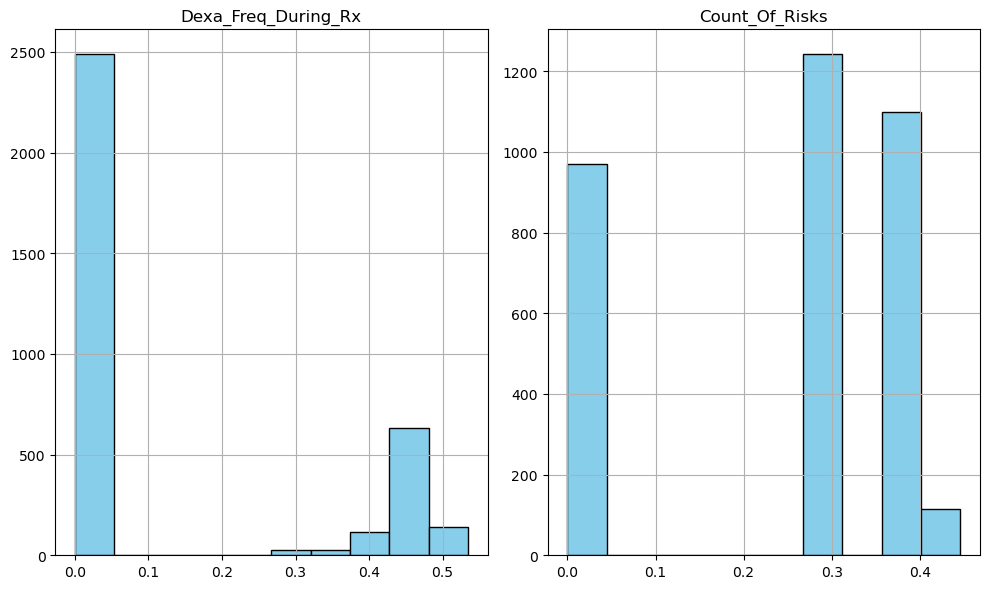

In [79]:
Histogram after transformation

plt.figure(figsize=(10, 6))
health_df3.hist(color='skyblue', edgecolor='black', figsize=(10, 6))
plt.tight_layout()  
plt.show()

After applying log transformation to the skewed columns reduces tge skewness